## Flight Data Exploration

In [4]:
#Importing libraries

import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

#### Gathering data

I have decided to combine data across four years for analysis.

In [5]:
#Reading csv files
data_2003=pd.read_csv('2003.csv').sample(frac=0.05)

In [6]:
data_2004=pd.read_csv('2004.csv').sample(frac=0.05)

In [7]:
data_2005=pd.read_csv('2005.csv').sample(frac=0.05)

In [8]:
data_2006=pd.read_csv('2006.csv').sample(frac=0.05)

#### Combining the csv files into one single file

In [9]:
# Using pandas concat function to combine all 4 dataframes
frames=[data_2003,data_2004,data_2005,data_2006]
flight_data = pd.concat(frames, axis=0, ignore_index=True)

In [7]:
# Checking the dataframe's structure
flight_data.shape

(1395017, 29)

In [11]:
# Maintaining copy of the data into a csv file
flight_data.to_csv('Final_Flights1.csv')

In [9]:
#Displaying first few rows of the dataframe
flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,7,4,5,1415.0,1415,1532.0,1540,WN,1489,...,4,7,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2003,1,23,4,844.0,845,1016.0,1016,UA,581,...,4,21,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2003,8,30,6,1053.0,1100,1152.0,1210,MQ,5012,...,4,12,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2003,6,3,2,1233.0,1235,1955.0,1957,NW,278,...,8,12,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2003,6,23,1,623.0,625,708.0,708,XE,2676,...,4,19,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Changing data type of 'DepTime','ArrTime','CRSDepTime','CRSArrTime' from int64 to datetime
flight_data['DepTime']=pd.to_datetime(flight_data['DepTime'])
flight_data['CRSDepTime']=pd.to_datetime(flight_data['CRSDepTime'])
flight_data['ArrTime']=pd.to_datetime(flight_data['ArrTime'])
flight_data['CRSArrTime']=pd.to_datetime(flight_data['CRSArrTime'])

### Univariate Exploration

In [2]:
flight_data=pd.read_csv('Final_Flights.csv')

In [10]:
flight_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.395017e+06,1.395017e+06,1.395017e+06,1.395017e+06,1.370866e+06,1.395017e+06,1.368069e+06,1.395017e+06,1.395017e+06,1.368069e+06,...,1.395017e+06,1.395017e+06,1.395017e+06,1.395017e+06,1.395017e+06,1.261168e+06,1.261168e+06,1.261168e+06,1.261168e+06,1.261168e+06
mean,2.004535e+03,6.533692e+00,1.573373e+01,3.941825e+00,1.343998e+03,1.338012e+03,1.494430e+03,1.501821e+03,2.087742e+03,1.242228e+02,...,7.197940e+02,7.367465e+00,1.550267e+01,1.731233e-02,2.004993e-03,2.897603e+00,6.513415e-01,3.399860e+00,2.490945e-02,3.686739e+00
std,1.107174e+00,3.429372e+00,8.793223e+00,1.989977e+00,4.731126e+02,4.615704e+02,4.947213e+02,4.765459e+02,1.933889e+03,7.066738e+01,...,5.705439e+02,3.966772e+01,1.212400e+01,1.304325e-01,4.473226e-02,1.722806e+01,8.377085e+00,1.490194e+01,1.145070e+00,1.763312e+01
min,2.003000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-5.450000e+02,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+01,0.000000e+00,0.000000e+00
25%,2.004000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.350000e+02,9.330000e+02,1.117000e+03,1.122000e+03,5.870000e+02,7.300000e+01,...,3.080000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.005000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.327000e+03,1.521000e+03,1.524000e+03,1.439000e+03,1.050000e+02,...,5.540000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.006000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.732000e+03,1.725000e+03,1.913000e+03,1.910000e+03,3.113000e+03,1.550000e+02,...,9.480000e+02,7.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.006000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.655000e+03,2.359000e+03,2.735000e+03,2.400000e+03,9.584000e+03,1.797000e+03,...,4.962000e+03,1.479000e+03,1.439000e+03,1.000000e+00,1.000000e+00,1.277000e+03,8.980000e+02,1.010000e+03,2.630000e+02,1.099000e+03


In [28]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395017 entries, 0 to 1395016
Data columns (total 29 columns):
Year                 1395017 non-null int64
Month                1395017 non-null int64
DayofMonth           1395017 non-null int64
DayOfWeek            1395017 non-null int64
DepTime              1370958 non-null float64
CRSDepTime           1395017 non-null int64
ArrTime              1368181 non-null float64
CRSArrTime           1395017 non-null int64
UniqueCarrier        1395017 non-null object
FlightNum            1395017 non-null int64
TailNum              1393748 non-null object
ActualElapsedTime    1368181 non-null float64
CRSElapsedTime       1395017 non-null float64
AirTime              1368181 non-null float64
ArrDelay             1368181 non-null object
DepDelay             1370958 non-null object
Origin               1395017 non-null object
Dest                 1395017 non-null object
Distance             1395017 non-null int64
TaxiIn               1395017 non-nu

### Univariate Exploration

Checking the busiest day of the week. I have chosen a histogram here as I am dealing with a numeric value.

Text(0.5,1,'Frequency of trips across different days of a week')

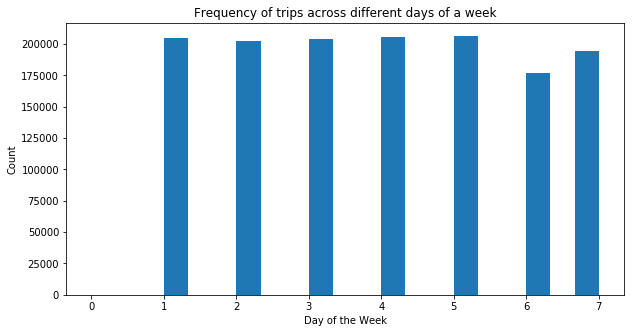

In [79]:
# Setting the figure size and bin size for a more ploished plot

plt.figure(figsize = [10, 5])
bin_edges = np.arange(0, flight_data['DayOfWeek'].max()+1/3, 1/3)
plt.hist(data = flight_data, x = 'DayOfWeek', bins = bin_edges)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Frequency of trips across different days of a week')

Checking trips against each carrier. I have used a bar chart to plot this categorical value.

Text(0.5,1,'Number of trips against different Carriers')

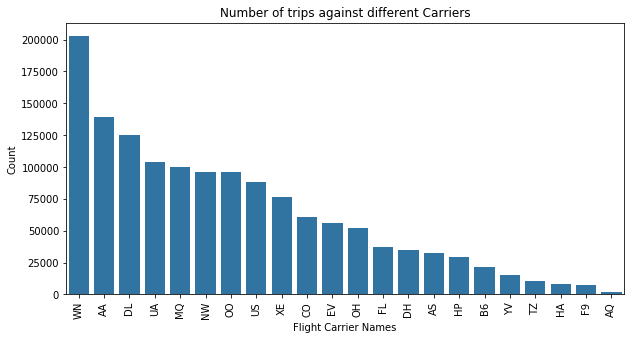

In [72]:
plt.figure(figsize = [10, 5])
carrier_order=flight_data['UniqueCarrier'].value_counts().index
sb.countplot(data=flight_data, x='UniqueCarrier', order=carrier_order, color=base_color)
# Rotation has been set for better readability of the labels
plt.xticks(rotation=90)
plt.xlabel('Flight Carrier Names')
plt.ylabel('Count')
plt.title('Number of trips against different Carriers')

### Bivariate Exploration

Calculating the total number of calculations against each destination.

In [ ]:
# Converting 'Cancelled' column to a categorical value
flight_data['Cancelled'] = flight_data['Cancelled'].astype('category')

In [3]:
df=flight_data.groupby('Dest')['Cancelled'].sum()

In [4]:
df

Dest
ABE      23
ABI      10
ABQ      52
ABY       9
ACK       4
ACT       9
ACV      18
ACY       5
ADK       4
ADQ      13
AEX      17
AGS      34
AKN       5
ALB      37
AMA      21
ANC     122
APF       0
ASE      10
ATL    1829
ATW      16
AUS      91
AVL      21
AVP      14
AZO      29
BDL      94
BET       5
BFL       7
BGM       8
BGR      19
BHM      50
       ... 
SRQ      15
STL     194
STT       6
STX       1
SUN      21
SWF       9
SYR      34
TEX       2
TLH      17
TOL      38
TPA     129
TRI      29
TTN       0
TUL      61
TUP       3
TUS      20
TVC      12
TWF      13
TXK      10
TYR       6
TYS      45
VCT       1
VIS       9
VLD       6
VPS      27
WRG       8
WYS       0
XNA      81
YAK       9
YUM       4
Name: Cancelled, Length: 299, dtype: int64

I have chosen a scatter plot to depict the relationship between two numeric values: Distance and Delay in Arrival.

Text(0,0.5,'Arrival Delay')

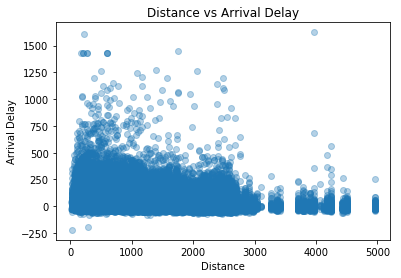

In [23]:
sb.regplot(data = flight_data, x = 'Distance', y = 'ArrDelay', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.title('Distance vs Arrival Delay')
plt.xlabel('Distance')
plt.ylabel('Arrival Delay')

I have plotted a clustered bar chart to show the change of factors for cancellations across the years.

Text(0.5,1,'Change of factors for cancellations across the years')

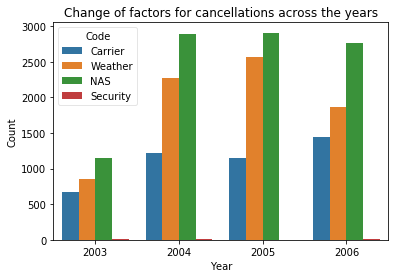

In [67]:
sb.countplot(data = flight_data, x = 'Year', hue = 'CancellationCode')
# Listing all the factors that contribute to cancellations
labels=['Carrier','Weather','NAS','Security']
plt.legend(labels, loc = 2, ncol = 1, framealpha = 0.5, title = "Code")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change of factors for cancellations across the years')


Comparison between different variables for better exploration of data.

In [82]:
flight_data['Year']=flight_data['Year'].astype('category')

C:\Users\1022538\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


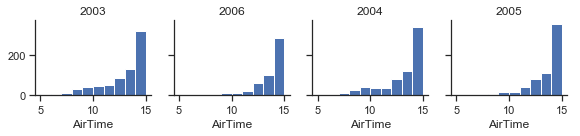

In [20]:
group_means = flight_data.groupby(['Year']).mean()
group_order = group_means.sort_values(['AirTime'], ascending = False).index

g = sb.FacetGrid(data = flight_data, col = 'Year', col_wrap = 4, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'AirTime', bins = np.arange(5, 15+1, 1))
g.set_titles('{col_name}')

In [29]:
flight_data['ArrDelay']=flight_data['ArrDelay'].astype('float64')
flight_data['DepDelay']=flight_data['DepDelay'].astype('float64')

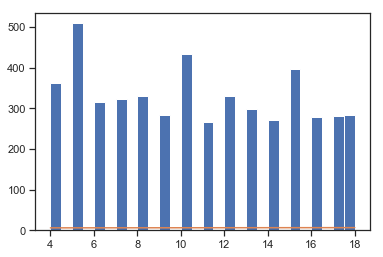

In [31]:
bin_size = 0.5
bin_edges = np.arange(4, 18 + bin_size, bin_size)
plt.hist(data = flight_data, x = 'ArrTime', bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = flight_data['ArrTime'].mean()
samp_sd = flight_data['ArrTime'].std()

from scipy.stats import norm
x = np.linspace(4, 18, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= flight_data.shape[0] * bin_size # scale the distribution height

plt.plot(x, y)

Text(0,0.5,'Observed Values')

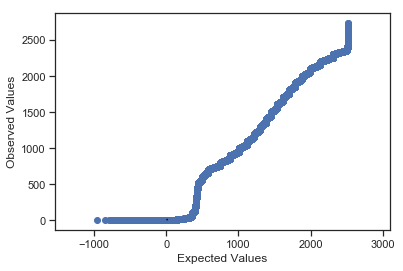

In [32]:
n_points = flight_data.shape[0]
qs = (np.arange(n_points) - .5) / n_points
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, flight_data['ArrTime'].sort_values())
plt.plot([4,18],[4,18],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values')

Text(0,0.5,'Observed Standard Scores')

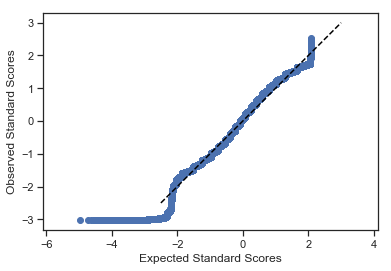

In [34]:
expected_scores = norm.ppf(qs)
data_scores = (flight_data['ArrTime'].sort_values() - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,3],[-2.5,3],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores')

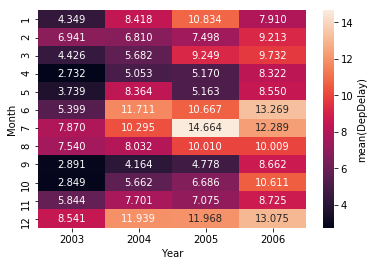

In [12]:
cat_means = flight_data.groupby(['Year', 'Month']).mean()['DepDelay']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Month', columns = 'Year',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DepDelay)'})